## A Jupyter Notebook to demonstrate some key features of the PSpy module

data is ONLY for demonstration purposes. If you would like to use the data for any kind of analysis, please contact flovan@bas.ac.uk first

Notebook code can be run by clicking on a code cell and hitting SHIFT + ENTER


Jupyter Notebooks can run different types of code (i.e. bash, Python and R (if installed). The code block below will run some bash code to identify your current directory. Note that this may not work on a Windows PC.

In [ ]:
%%bash
echo current directory is:
echo
pwd
echo ------------------------------------------------------
echo content of the data directory is:
echo
ls ../data
echo ------------------------------------------------------
echo The module directory is:
echo
ls ../

You need to point Python to the directory where the main PSpy module (mypysmps) is located and add this location to your paths so that you can use relative imports. The code block below will do this. NOTE that on windows, you may have to change forward slashed with backslashes and if you have changed the directory structure you may have to change the second line   

In [1]:
# import the Pspy module from the module directory
import sys
sys.path.append("./../") # set this path to where the mypysmps is located

# the following two lines will import the read function and PSDisplay object from the mypysmps module
from mypysmps.io.read import read
from mypysmps.graph.psdisplay import PSDisplay

The Particle Sizer (PSpy) library contains a number of functions in the io (in/out) module, which will automatically read certain data files into a Particle Sizer object. Once the data is organised into a ParticleSizer object, other functionalities in the PSpy library can handle these objects automatically. This simplifies and homogenises working with different particle sizer instruments as adding new instruments only requires adding new readers.

The idea and outline of the PSpy module is based on the [PyART](https://arm-doe.github.io/pyart/) toolbox.

The code below will read one of the demonstration SMPS files into an instance of the Particle Sizer object, here called ''SMPS'' - but it can be given any convenient name. Make sure to change the path to the ''Penlee_050520dN.csv'' file if necessary.   

In [2]:
# read data into an instance of the particle sizer object
SMPS = read("../data/Penlee_050520dN.csv") # change the path if necessary!

The reader will take the information from the SMPS file, and store it into the Particle Sizer object. In this case, the data type is dN/dlogDP, but the reader will accept other formats (i.e. raw counts) as well.

In [ ]:
print(SMPS.__doc__)

The Particle Sizer object has a number of attributes and functions which can be accessed by typing ''SMPS.'' (make sure to add the fullstop) and hitting the TAB key. The attributes can also be printed, as below 

In [14]:
print(dir(SMPS))

['D50', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', 'add_field', 'aerosol_flow', 'bypass_flow', 'checkAttr', 'comment', 'createTimeDate', 'create_bins', 'data', 'date', 'datetime', 'density', 'diameter', 'findSample', 'geo_mean', 'geo_std_dev', 'header', 'high_voltage', 'instrument_errors', 'instrument_id', 'instrument_type', 'lab_id', 'leak_test_rate', 'low_voltage', 'lower_size', 'mean', 'mean_free_path', 'median', 'metadata', 'mode', 'neutralizer_status', 'pddata', 'pressure', 'relative_humidity', 'retrace_time', 'sample', 'sample_id', 'scan_resolution', 'scan_time', 'scans_per_sample', 'sheath_flow', 'td05', 'temperature', 'tf', 'time', 'title', 'total_concent

The particle sizer metadata is stored in different dictionaries. The actual data, is stored under data, and under the name of the variable. The idea is that different types of variables (normalised number concentration, raw counts etc) can be stored in a single particle sizer object. 

In [15]:
SMPS.data.keys()

dict_keys(['normalised_number_concentration', 'variables', 'coordinates'])

In [ ]:
SMPS.data['normalised_number_concentration']

The Particle Sizer object also has a set of useful functions which can be applied to the data inside the object. The findsample function for example, will return the date of a sample if given a sample number, or the index of a sample if given a time and date.

In [ ]:
# possibility to explore the data and methods stored in instance
print(SMPS.findSample.__doc__)

In [ ]:
# find the 100th sample
SMPS.findSample(100)

In [ ]:
# find the index of the sample closest to midnight on the 19th of May 2020
SMPS.findSample('2020.05.19 00:00:00')

In [ ]:
# get the data of the sample closest to midnight on the 19th of May 2020
SMPS.data['normalised_number_concentration']['data'][:,SMPS.findSample('2020.05.19 00:00:00')]

Other objects and functions in the PSpy library will also take instances of the Particle Sizer object as an input, such as the PSDisplay plotting object 

In [3]:
# create a plotting object
display = PSDisplay(SMPS)

In [ ]:
# display data
display.plot('normalised_number_concentration')

The PSpy library can concatenate several files of the same particle sizer type into a single Particle Sizer instance. Missing data can either be filled with NaN values if the fill_time flag is set to True, or concatenated directly if the fill_time flag is set to False. If time periods of two files overlap, the function will only take the data of the first file. At the moment, the results of this function can be unstable if the files have different diameter bins - combining these correctly is still a work in progress!  

In [6]:
# concatenate data files
SMPS2 = read("../data/Penlee_190520dN.csv")
from mypysmps.util.ps_utils import stack_ps
concatenated = stack_ps(SMPS, SMPS2, message = False, fill_time = True)

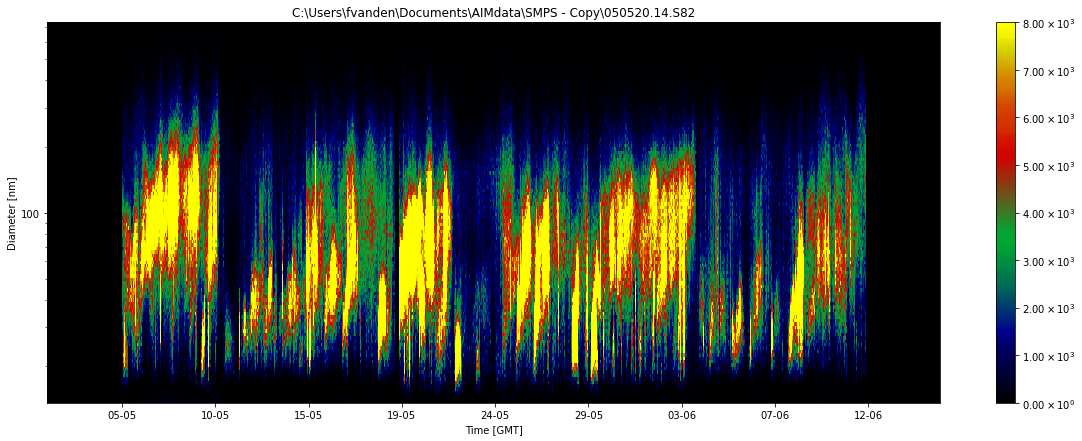

In [7]:
display_concatenated = PSDisplay(concatenated)
display_concatenated.plot('normalised_number_concentration', clim = (0, 8*10**3))

In [ ]:
print(PSDisplay.plot.__doc__)

The display class has different functionalities, such as heat maps, time lines and informative functions. The timeline of any one-dimentional variable can be plotted as shown below  

In [ ]:
display_concatenated.timeLine('aerosol_flow') # ylim = (0.2, 0.4), title = 'Aerosol flow'

The timeline of a single diameter can be plotted by specifying either the index of the bin (i.e. the 50th bin) as an integer value or the diameter of the bin (i.e. 82.0) as a float value

In [ ]:
display_concatenated.timeLine('normalised_number_concentration', diameter = 50, ylim = (0,30000))

In [ ]:
SMPS.diameter['data'][50]

In [ ]:
display_concatenated.timeLine('normalised_number_concentration', diameter = 82.0, ylim = (0,30000))

the plotInfo function, allows to plot some basic values for the Particle Sizer object

In [9]:
display.plotInfo()

                                Sample File: | C:\Users\fvanden\Documents\AIMdata\SMPS - Copy\050520.14.S82
                                AIM Version: | 10.3.0.3                                            
                           Classifier Model: | 3082                                                
                             Classifier S/N: | 3082001651003                                       
                Classifier Firmware Version: | 2.10                                                
                          Neutralizer Model: | 3088                                                
                            Neutralizer S/N: | 3088011703001                                       
                              Impactor (cm): | 0.0508                                              
                               Impactor S/N: | 5080134                                             
                                  DMA Model: | 3081                                         

## Reading other types of data

The advantage of the Particle Sizer library is that new instruments can be added by only adding a reader function in the IO module which will read the data into a Particle Sizer object. 

The OPC example file below is read into a Particle Sizer object called ''OPC''. After this, the same functions and applications as above can be used on the OPC data.

In [13]:
OPC = read("../data/210403.csv", fileorg = 'OPC', message = False) # change the path if necessary!

resetting value 236006.07
resetting value 236012.47
resetting value 236018.87
resetting value 236025.27
resetting value 236031.67
resetting value 236038.07
resetting value 236044.47
resetting value 236050.87
resetting value 236057.27
Repairing strange value 0240103.66 into 024003.66
Repairing strange value 0240110.06 into 024010.06
Repairing strange value 0240116.46 into 024016.46
Repairing strange value 0240122.86 into 024022.86
Repairing strange value 0240129.25 into 024029.25
Repairing strange value 0240135.55 into 024035.55
Repairing strange value 0240141.95 into 024041.95
Repairing strange value 1641010.00 into 164110.00
Repairing strange value 2341010.00 into 234110.00
10


In [17]:
print(dir(OPC))

['MeanToFBin1', 'MeanToFBin3', 'MeanToFBin7', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_field', 'checkAttr', 'createTimeDate', 'create_bins', 'data', 'date', 'datetime', 'diameter', 'duration', 'findSample', 'fix_time', 'header', 'instrument_type', 'laser_status', 'latitude', 'longitude', 'metadata', 'particulate_matter1', 'particulate_matter10', 'particulate_matter2_5', 'pump_setting', 'reject_count_OOR', 'reject_glitch', 'reject_long_TOF', 'reject_ratio', 'relative_humidity', 'sample', 'sample_flow', 'scan_time', 'sheath_flow', 'status_inlet_heater', 'status_inside_heater', 'temperature', 'temperature_box', 'temperature_inlet', 'time']


In [18]:
print(OPC.data.keys())

dict_keys(['raw_counts', 'coordinates', 'variables'])


Our OPC files do not have headers, which is why the header and diameters - as is terrible coding practice - are hard-coded in the OPC reader scripts. The OPC diameters are given in bin boundaries (whereas for the SMPS the mid point diameter is given). The OPC reader will give all of the diameter boundaries (see below) but the plotting function will throw an error because it requires the data dimensions to be equal to the diameter x sample number dimensions. That is why the upper boundary will be removed from the diameter variable in the code blocks below   

In [24]:
OPC.data['raw_counts']['data'].shape

(24, 13088)

In [25]:
len(OPC.diameter['data'])

25

In [26]:
OPC.diameter['data'] = OPC.diameter['data'][:-1]

In [19]:
# read into a PSDisplay object
opcdisplay = PSDisplay(OPC)

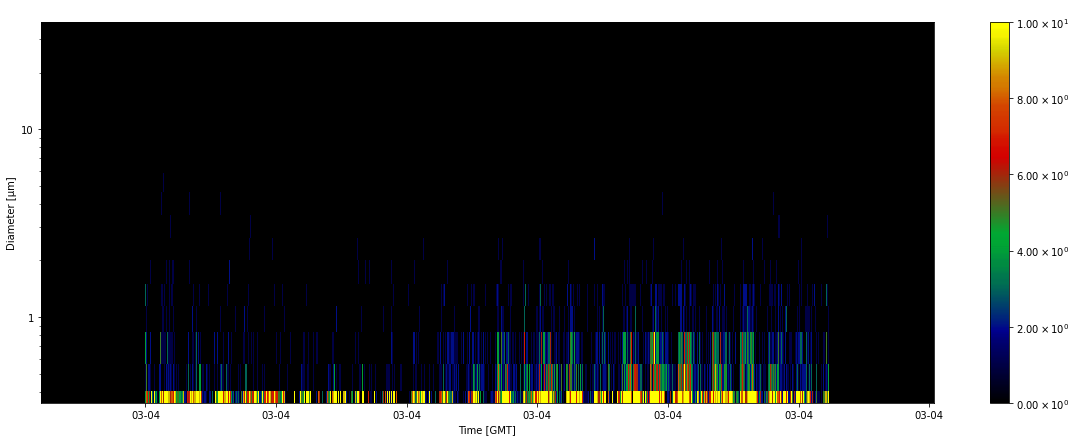

In [28]:
# plot OPC data

opcdisplay.plot('raw_counts', clim = (0, 1*10**1))

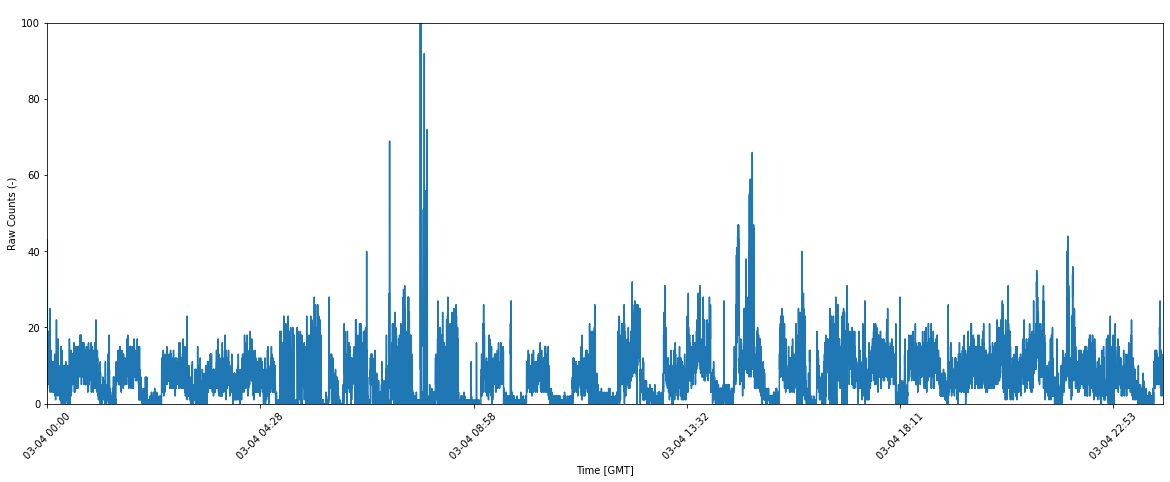

In [33]:
opcdisplay.timeLine('raw_counts', ylim = (0, 1*10**2))

DISCLAIMER: this is a work-in-progress with hard coded bits of code. The plotting functions have been coded to accomodate different data types, so always check units and values. When in doubt, double check the output! (and please do let me know if you run in to errors :) )